# 【課題】糖尿病の進行状況を予測（回帰）しよう

## データを読み込む

まずは、最初のセルを実行し、データを読み込んでください。今回はscikit-learnに標準で入っているデータを使います。

In [1]:
# scikit-learnの糖尿病のデータセットを読み込む（変更しないでください）
from sklearn import datasets
diabetes_data = datasets.load_diabetes()

読み込んだデータについて確認します。

In [3]:
# データセットのDESCRを確認する（変更しないでください）
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# 読み込んだデータが何行何列かをshapeで確認する（変更しないでください）
print(diabetes_data.data.shape)
print(diabetes_data.target.shape)

(442, 10)
(442,)


このデータは、糖尿病患者に関する10種類のデータを持っています。主要なもののみ、以下に概要を記載します。

- `age`：年齢
- `sex`：性別
- `bmi`：身長と体重から計算されたBMI
- `bp`：血圧の平均

目的変数には、各患者の1年後の糖尿病の進行状況を数値化したものが入っています。

今回は `bmi`（BMI）と `bp`（血圧）を説明変数として採用します。スライスを使い、`diabetes_data` の `data` と `target` から、それぞれ `X` と `y` を作成しましょう。なお、今回はscikit-learnが持つデータを読み込んでいるので、データはndarray型です。一度Pandasに変更してからスライスでも良いですが、ここではndarrayのまま `data` からスライスしています。

In [5]:
# スライスして X と y を作成する（変更しないでください）
X = diabetes_data.data[:, 2:4]
y = diabetes_data.target

`X` の最初の10件を表示して、データがどのようになっているかを確認します。

In [7]:
# 特徴量（説明変数）の最初の10件をスライスして表示する
print("--- 特徴量X（BMIと血圧）の最初の10件 ---")
print(X[:10])

--- 特徴量X（BMIと血圧）の最初の10件 ---
[[ 0.06169621  0.02187239]
 [-0.05147406 -0.02632753]
 [ 0.04445121 -0.00567042]
 [-0.01159501 -0.03665608]
 [-0.03638469  0.02187239]
 [-0.04069594 -0.01944183]
 [-0.04716281 -0.01599898]
 [-0.00189471  0.06662945]
 [ 0.06169621 -0.04009893]
 [ 0.03906215 -0.03321323]]


このデータは最初から正規化されているため、このような数値となっています。

`y` のデータも表示してみましょう。

In [8]:
# 目的変数の最初の10件をスライスして表示する
print("--- 目的変数y（1年後の糖尿病進行度）の最初の10件 ---")
print(y[:10])


--- 目的変数y（1年後の糖尿病進行度）の最初の10件 ---
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


`y`（糖尿病の進行状況）の数値がどのように計測、あるいは計算されたものかについての説明は公表されていませんが、数値が大きいほど、糖尿病が進行しているものと認識してください。

## データの前処理について

今回は、とくに何か前処理を行なう必要はありませんので、スキップして進めます。

## データを訓練データとテストデータに分ける

X および y を訓練データとテストデータに分けましょう。その際、訓練データ8割、テストデータ2割としてください。また、並び順がランダムになるよう、分割してください。

In [21]:
# 訓練データ8割、テストデータ2割に分割する
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)
# shuffle=True
"""
shuffle=Trueは、データをランダムに並び替える機能そのものです。
train_test_splitでは、このshuffleは、**デフォルトでTrue**になっています。
そのため、わざわざshuffle=Trueと書かなくても、自動的にデータはシャッフルされます。
"""
# random_state=42
"""
random_stateは、ランダムな処理を**固定するための「種（シード）」**のようなものです。
shuffle機能は実行するたびに異なるランダムな結果を生み出しますが、random_stateに特定の数字（今回は42）を指定することで、そのランダムなシャッフルの仕方が固定されます。
これにより、コードを何度実行しても、必ず同じようにデータが分割されるようになります。これを**「再現性の確保」**と言います。
"""

print(f"訓練データの形状: {X_train.shape}")
print(f"テストデータの形状: {X_test.shape}")

訓練データの形状: (353, 2)
テストデータの形状: (89, 2)


## モデルを作成して訓練する

ここでは、レッスン本文でも利用した「線形回帰モデル」（`LinearRegression`）を使います。また、作成したモデルに訓練データを渡して、学習を行ないます。

In [11]:
# LinearRegressionの線形回帰モデルを作成する
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 訓練データを使って訓練を行なう
model.fit(X_train, y_train)
print("モデルの訓練が完了しました。")

モデルの訓練が完了しました。


## 期待する性能が出たかを評価する

予測を実行しましょう。

In [12]:
# テストデータを使って予測（回帰）を実行する
y_pred = model.predict(X_test)
print("テストデータに対する予測が完了しました。")

テストデータに対する予測が完了しました。


モデルの評価を行なううえで、まずは予測値と正解値の散布図を作ります。

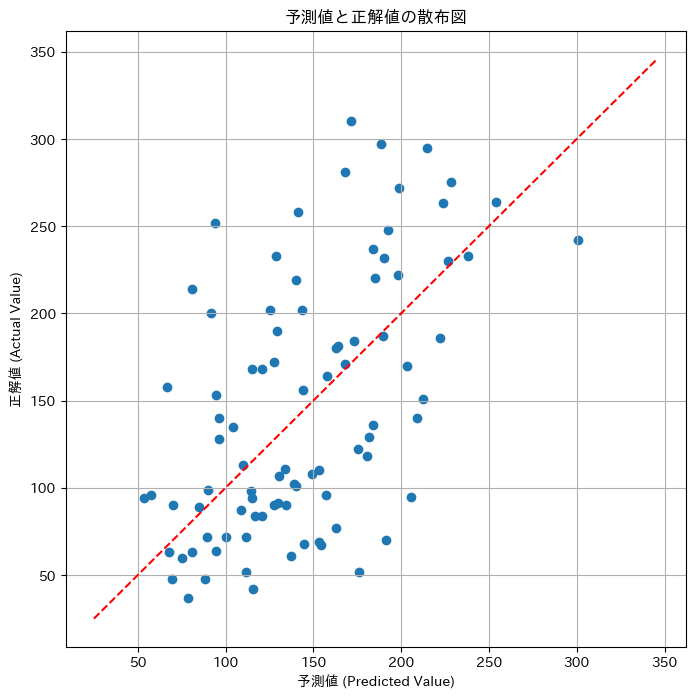

In [ ]:
# 横軸が予測値、縦軸は正解値でプロットした散布図を表示する
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のためにインポート
# 便宜上、幅8インチ、高さ8インチの正方形のキャンバスとする。
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test)
# 理想的な予測（y=x）の直線を引く
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("予測値 (Predicted Value)")
plt.ylabel("正解値 (Actual Value)")
plt.title("予測値と正解値の散布図")
plt.grid(True)
plt.show()


正解値と予測値の平均二乗誤差を求めます。

In [14]:
# 正解値と予測値の平均二乗誤差を計算して表示する
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"平均二乗誤差 (MSE): {mse:.2f}")

平均二乗誤差 (MSE): 3740.51


平均二乗誤差の平方根を計算し、正解値と予測値のズレの大きさを求めましょう。

In [15]:
# 平均二乗誤差の平方根を計算して表示する
import numpy as np
rmse = np.sqrt(mse)
print(f"二乗平均平方根誤差 (RMSE): {rmse:.2f}")


二乗平均平方根誤差 (RMSE): 61.16
